In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from random import *


In [2]:
N = 100
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m) #generate BA

In [3]:
N = len(GBA)
M = GBA.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

Number of nodes: 100
Number of edges: 384
Average degre: 7.68


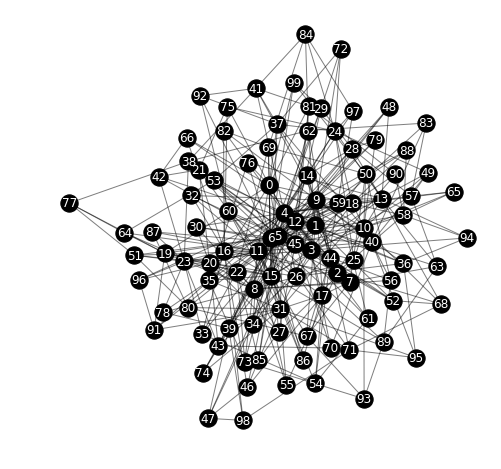

In [4]:
pos = nx.fruchterman_reingold_layout(GBA);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(GBA, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(GBA, pos, alpha=0.500);
nx.draw_networkx_labels(GBA, pos, font_color="white");
plt.show();

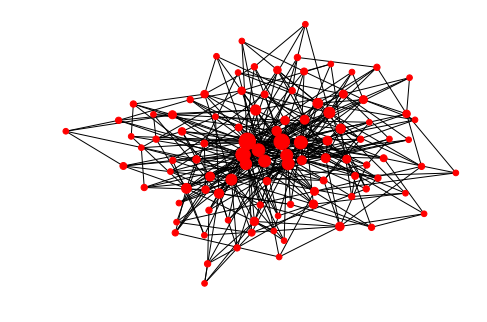

In [5]:
d = dict(GBA.degree())
nx.draw(GBA, nodelist=d.keys(), node_size=[v * 8 for v in d.values()])

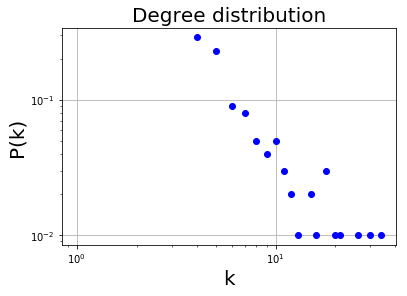

In [6]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

ks, Pk = degree_distribution(GBA)

plt.figure()
plt.loglog(ks,Pk,'bo',basex=10,basey=10)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)



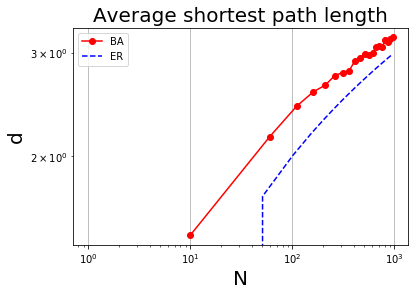

In [7]:
vd = []
vn = []
av_degree = 8
m = int(av_degree/2)
Nmax = 1000
for n in arange(10,Nmax, Nmax/20):
    GBA = nx.barabasi_albert_graph(n, m)
    vd.append(nx.average_shortest_path_length(GBA))
    vn.append(n)
plt.figure()
plt.loglog(vn,vd,'-or',basex=10,basey=10, label='BA')
x = arange(1, Nmax, Nmax/20)
plt.loglog(x,log10(x),'--b', label='ER', basex=10,basey=10)
plt.xlabel("N", fontsize=20)
plt.ylabel("d", fontsize=20)
plt.title("Average shortest path length", fontsize=20)
plt.grid(True)
plt.legend()
plt.show();

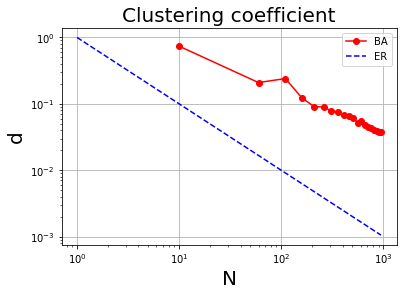

In [8]:
vc = []
vn = []
av_degree = 8
m = int(av_degree/2)
Nmax = 1000
for n in arange(10,Nmax, Nmax/20):
    GBA = nx.barabasi_albert_graph(n, m)
    #vd.append(nx.diameter(GBA))
    vc.append(nx.average_clustering(GBA))
    vn.append(n)
plt.figure()
plt.loglog(vn,vc,'-or',basex=10,basey=10, label='BA')
x = arange(1, Nmax, Nmax/20)
plt.loglog(x,1/x,'--b', label='ER', basex=10,basey=10)
plt.xlabel("N", fontsize=20)
plt.ylabel("d", fontsize=20)
plt.title("Clustering coefficient", fontsize=20)
plt.grid(True)
plt.legend()
plt.show();

In [9]:
N = 500
av_degree = 8
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)
r=nx.degree_assortativity_coefficient(GBA)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.0700


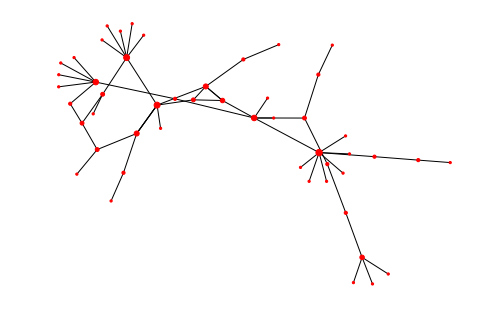

In [8]:
N = 100
a = 2.5
seq = np.random.zipf(a, N) #Zipf distribution
#seq = np.random.poisson(10, N) #Poisson distribution
#print(seq)
if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = randint(0, len(seq))
    seq[pos] = seq[pos]+ 1
#print(sum(seq))
GCM=nx.configuration_model(seq)
#nx.draw(GCM)
#plt.show()
#get the largest component
Gcc=sorted(nx.connected_component_subgraphs(GCM), key = len, reverse=True)
G=Gcc[0]
d = dict(G.degree())
nx.draw(G, nodelist=d.keys(), node_size=[v * 5 for v in d.values()])
plt.show()



Number of nodes: 15
Number of edges: 15
Average degre: 2.0


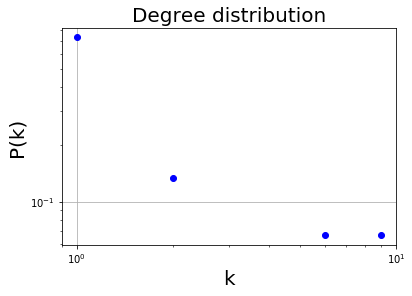

In [12]:


N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)
print('Average degre:', 2*M/N)

ks, Pk = degree_distribution(G)

plt.figure()
plt.loglog(ks,Pk,'bo',basex=10,basey=10)
#plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)



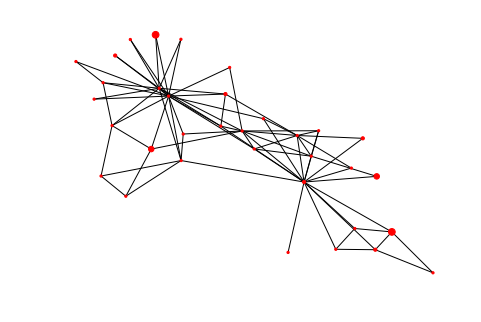

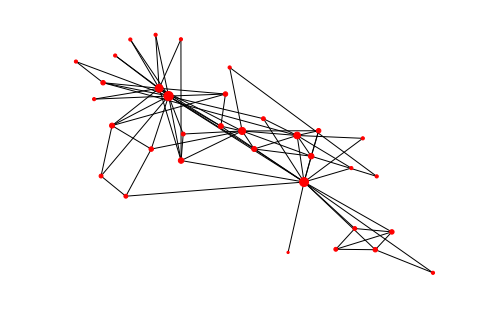

In [13]:
import networkx as nx
G=nx.karate_club_graph()
pos=nx.nx.fruchterman_reingold_layout(G)
nx.draw(G, node_size=[v * 5 for v in d.values()], pos = pos)
plt.show()

nt = 5 #number of rewirings
for i in arange(nt):
    G = nx.double_edge_swap(G) #perform a rewiring of edges selected at random
d = dict(G.degree()) #draw the size of the nodes according to the degrees
nx.draw(G, node_size=[v * 5 for v in d.values()], pos = pos)
plt.show()